 # Advanced Weather Data Analysis using OpenWeatherMap API, Python, Excel & Power BI

In [1]:
# Import Libraries
import requests
import pandas as pd
import time
from datetime import datetime
import schedule
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Set Up API Key and City List
API_KEY ="67c5a95b63cddf94c9a63f3fa99cbe7e"  
CITIES = ["Mumbai", "Delhi", "Bangalore", "Hyderabad", "Ahmedabad","Chennai", "Kolkata", "Pune", "Jaipur", "Lucknow",]
BASE_URL = "https://api.openweathermap.org/data/2.5/weather"
FORECAST_URL = "https://api.openweathermap.org/data/2.5/forecast"


In [3]:
# Create Folder for Data

if not os.path.exists("weather_data"):
    os.makedirs("weather_data")

In [4]:
def fetch_weather_data():
    records = []   # ✅ Initialize the list before starting

    for city in CITIES:
        try:
            params = {"q": city, "appid": API_KEY, "units": "metric"}
            response = requests.get(BASE_URL, params=params)
            data = response.json()

            if response.status_code == 200:
                record = {
                    "City": city,
                    "Temperature (°C)": data["main"]["temp"],
                    "Feels Like (°C)": data["main"]["feels_like"],
                    "Humidity (%)": data["main"]["humidity"],
                    "Pressure (hPa)": data["main"]["pressure"],
                    "Wind Speed (m/s)": data["wind"]["speed"],
                    "Visibility (m)": data.get("visibility", None),
                    "Weather": data["weather"][0]["main"],
                    "Description": data["weather"][0]["description"],
                    "Time": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                }
                records.append(record)
            else:
                print(f"⚠️ Failed for {city}: {data}")

        except Exception as e:
            print(f"Error fetching {city}: {e}")

    # ✅ Convert to DataFrame after collecting all cities
    df = pd.DataFrame(records)

    # ✅ Save to Excel
    df.to_excel(f"weather_data/weather_{datetime.now().strftime('%Y%m%d_%H')}.xlsx", index=False)
    print("✅ Current weather data fetched and saved.")
    
    return df   # ✅ make sure this is here and aligned with 'def', not indented inside the loop


In [5]:
# Fetch latest weather data
df = fetch_weather_data()

# Print the DataFrame
print(df)

# Display nicely formatted table
df.head()


✅ Current weather data fetched and saved.
        City  Temperature (°C)  Feels Like (°C)  Humidity (%)  Pressure (hPa)  \
0     Mumbai             29.99            29.35            37            1015   
1      Delhi             22.96            22.70            53            1018   
2  Bangalore             26.57            26.57            63            1015   
3  Hyderabad             26.23            26.23            34            1017   
4  Ahmedabad             26.02            26.02            36            1018   
5    Chennai             27.81            32.67            87            1014   
6    Kolkata             26.97            26.79            39            1015   
7       Pune             27.83            27.86            45            1017   
8     Jaipur             25.21            24.13            13            1018   
9    Lucknow             25.58            24.74            21            1017   

   Wind Speed (m/s)  Visibility (m) Weather    Description  \
0   

,City,Temperature (°C),Feels Like (°C),Humidity (%),Pressure (hPa),Wind Speed (m/s),Visibility (m),Weather,Description,Time
0,Mumbai,29.99,29.35,37,1015,4.12,3000,Smoke,smoke,2025-11-13 11:44:42
1,Delhi,22.96,22.70,53,1018,3.09,1500,Smoke,smoke,2025-11-13 11:44:42
2,Bangalore,26.57,26.57,63,1015,8.05,10000,Clouds,broken clouds,2025-11-13 11:44:43
3,Hyderabad,26.23,26.23,34,1017,3.60,5000,Haze,haze,2025-11-13 11:44:43
4,Ahmedabad,26.02,26.02,36,1018,3.09,3000,Smoke,smoke,2025-11-13 11:44:44


In [6]:
 # Fetch Forecast (Next 5 Days)
def get_forecast(city):
    params = {"q": city, "appid": API_KEY, "units": "metric"}
    response = requests.get(FORECAST_URL, params=params)
    data = response.json()
    records = []

    if response.status_code == 200:
        for i in data["list"]:
            records.append({
                "City": city,
                "DateTime": i["dt_txt"],
                "Temp (°C)": i["main"]["temp"],
                "Humidity (%)": i["main"]["humidity"],
                "Weather": i["weather"][0]["main"]
            })
    else:
        print(f"⚠️ Forecast failed for {city}")
    
    return pd.DataFrame(records)

In [7]:
 # Fetch Forecast for All Cities



# Fetch forecast for all cities
forecast_data = pd.concat([get_forecast(city) for city in CITIES], ignore_index=True)

# Save forecast to Excel file
forecast_data.to_excel("weather_data/forecast_data.xlsx", index=False)
print("✅ 5-day forecast data saved to Excel.")

# Print and display forecast
print(forecast_data)
forecast_data.head()


✅ 5-day forecast data saved to Excel.
        City             DateTime  Temp (°C)  Humidity (%) Weather
0     Mumbai  2025-11-13 09:00:00      29.54            40   Clear
1     Mumbai  2025-11-13 12:00:00      28.32            50   Clear
2     Mumbai  2025-11-13 15:00:00      27.70            57   Clear
3     Mumbai  2025-11-13 18:00:00      26.83            56   Clear
4     Mumbai  2025-11-13 21:00:00      25.72            52   Clear
..       ...                  ...        ...           ...     ...
395  Lucknow  2025-11-17 18:00:00      19.60            34   Clear
396  Lucknow  2025-11-17 21:00:00      18.56            37   Clear
397  Lucknow  2025-11-18 00:00:00      17.58            40   Clear
398  Lucknow  2025-11-18 03:00:00      20.69            36   Clear
399  Lucknow  2025-11-18 06:00:00      25.93            26   Clear

[400 rows x 5 columns]


,City,DateTime,Temp (°C),Humidity (%),Weather
0,Mumbai,2025-11-13 09:00:00,29.54,40,Clear
1,Mumbai,2025-11-13 12:00:00,28.32,50,Clear
2,Mumbai,2025-11-13 15:00:00,27.70,57,Clear
3,Mumbai,2025-11-13 18:00:00,26.83,56,Clear
4,Mumbai,2025-11-13 21:00:00,25.72,52,Clear


In [8]:
 # Combine Current + Forecast Data for Power BI


with pd.ExcelWriter("weather_data/Weather_Report.xlsx") as writer:
    df.to_excel(writer, sheet_name="Current_Weather", index=False)
    forecast_data.to_excel(writer, sheet_name="Forecast", index=False)

print("✅ Combined Current + Forecast data exported to Weather_Report.xlsx")

✅ Combined Current + Forecast data exported to Weather_Report.xlsx


# DATA Analysis

In [9]:

# Basic Info
print("🔍 Basic Info:")
print(df.info())




🔍 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              10 non-null     object 
 1   Temperature (°C)  10 non-null     float64
 2   Feels Like (°C)   10 non-null     float64
 3   Humidity (%)      10 non-null     int64  
 4   Pressure (hPa)    10 non-null     int64  
 5   Wind Speed (m/s)  10 non-null     float64
 6   Visibility (m)    10 non-null     int64  
 7   Weather           10 non-null     object 
 8   Description       10 non-null     object 
 9   Time              10 non-null     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 932.0+ bytes
None


In [10]:
# Statistical Summary
print("\n📊 Statistical Summary:")
print(df.describe())



📊 Statistical Summary:
       Temperature (°C)  Feels Like (°C)  Humidity (%)  Pressure (hPa)  \
count         10.000000        10.000000     10.000000       10.000000   
mean          26.517000        26.706000     42.800000     1016.400000   
std            1.862895         2.811948     21.096603        1.505545   
min           22.960000        22.700000     13.000000     1014.000000   
25%           25.690000        25.060000     34.500000     1015.000000   
50%           26.400000        26.400000     38.000000     1017.000000   
75%           27.600000        27.592500     51.000000     1017.750000   
max           29.990000        32.670000     87.000000     1018.000000   

       Wind Speed (m/s)  Visibility (m)  
count         10.000000       10.000000  
mean           4.168000     5850.000000  
std            1.796885     3667.045435  
min            2.400000     1500.000000  
25%            3.090000     3000.000000  
50%            3.515000     4000.000000  
75%            

In [11]:
# First few rows
print("\n🪄 First 5 rows:")
print(df.head())




🪄 First 5 rows:
        City  Temperature (°C)  Feels Like (°C)  Humidity (%)  Pressure (hPa)  \
0     Mumbai             29.99            29.35            37            1015   
1      Delhi             22.96            22.70            53            1018   
2  Bangalore             26.57            26.57            63            1015   
3  Hyderabad             26.23            26.23            34            1017   
4  Ahmedabad             26.02            26.02            36            1018   

   Wind Speed (m/s)  Visibility (m) Weather    Description  \
0              4.12            3000   Smoke          smoke   
1              3.09            1500   Smoke          smoke   
2              8.05           10000  Clouds  broken clouds   
3              3.60            5000    Haze           haze   
4              3.09            3000   Smoke          smoke   

                  Time  
0  2025-11-13 11:44:42  
1  2025-11-13 11:44:42  
2  2025-11-13 11:44:43  
3  2025-11-13 11:44:43 

In [12]:
# Check for missing values
print("\n❗ Missing Values:")
print(df.isnull().sum())


❗ Missing Values:
City                0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        0
Pressure (hPa)      0
Wind Speed (m/s)    0
Visibility (m)      0
Weather             0
Description         0
Time                0
dtype: int64


In [13]:
# Weather Trend Analysis
# Sort by temperature to see hottest/coldest cities

print("\n🔥 Top 5 Hottest Cities:")
print(df[['City', 'Temperature (°C)']].sort_values(by='Temperature (°C)', ascending=False).head())

print("\n❄️ Top 5 Coldest Cities:")
print(df[['City', 'Temperature (°C)']].sort_values(by='Temperature (°C)', ascending=True).head())



🔥 Top 5 Hottest Cities:
        City  Temperature (°C)
0     Mumbai             29.99
7       Pune             27.83
5    Chennai             27.81
6    Kolkata             26.97
2  Bangalore             26.57

❄️ Top 5 Coldest Cities:
        City  Temperature (°C)
1      Delhi             22.96
8     Jaipur             25.21
9    Lucknow             25.58
4  Ahmedabad             26.02
3  Hyderabad             26.23


In [14]:
# Correlation Between Weather Parameters
# Correlation matrix
# Correlation Between Weather Parameters
print("\n📈 Correlation Matrix:")
print(df[['Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Wind Speed (m/s)']].corr())



📈 Correlation Matrix:
                  Temperature (°C)  Humidity (%)  Pressure (hPa)  \
Temperature (°C)          1.000000      0.192939       -0.681323   
Humidity (%)              0.192939      1.000000       -0.630385   
Pressure (hPa)           -0.681323     -0.630385        1.000000   
Wind Speed (m/s)          0.311947      0.758928       -0.785374   

                  Wind Speed (m/s)  
Temperature (°C)          0.311947  
Humidity (%)              0.758928  
Pressure (hPa)           -0.785374  
Wind Speed (m/s)          1.000000  


# Visualization

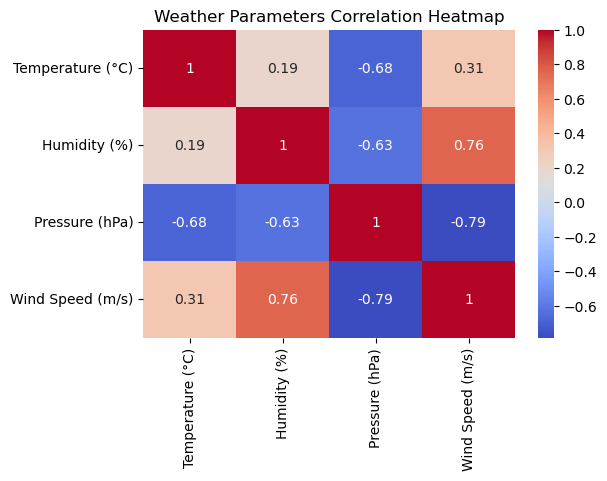

In [15]:
# Correlation matrix  Visualization
plt.figure(figsize=(6,4))
sns.heatmap(df[['Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Wind Speed (m/s)']].corr(), annot=True, cmap='coolwarm')
plt.title("Weather Parameters Correlation Heatmap")
plt.show()



🌤️ Weather Condition Counts:
Weather
Smoke     3
Clear     3
Haze      2
Clouds    1
Mist      1
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_1240\335014858.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weather', palette='viridis')


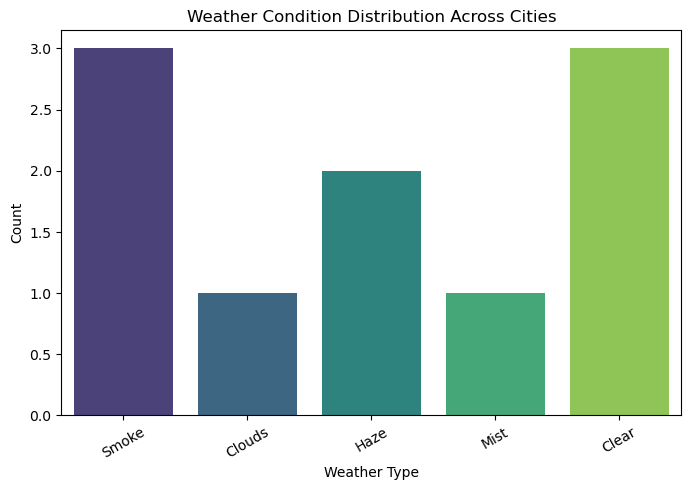

In [16]:
# Category-Based Insights (Weather Type)
print("\n🌤️ Weather Condition Counts:")
print(df['Weather'].value_counts())

# Visualization
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Weather', palette='viridis')
plt.title("Weather Condition Distribution Across Cities")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1240\4239915999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


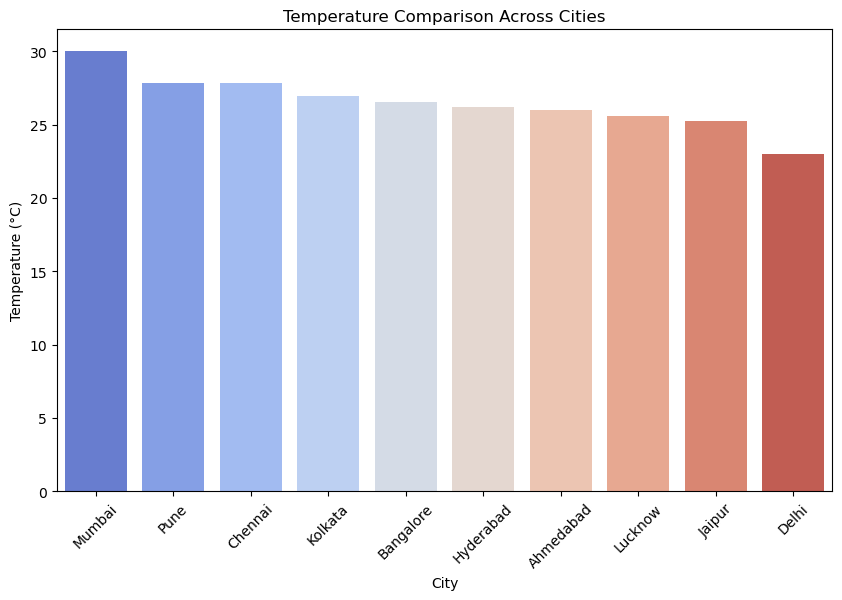

In [17]:
# Compare Temperature Across Cities
plt.figure(figsize=(10,6))
sns.barplot(
    data=df.sort_values('Temperature (°C)', ascending=False),
    x='City',
    y='Temperature (°C)',
    palette='coolwarm'
)
plt.title("Temperature Comparison Across Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.show()


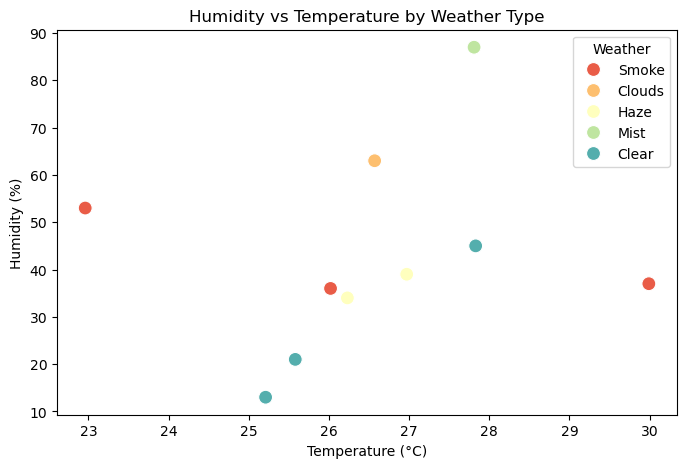

In [18]:
# Analyze Humidity vs Temperature
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Temperature (°C)', y='Humidity (%)', hue='Weather', s=100, palette='Spectral')
plt.title("Humidity vs Temperature by Weather Type")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.show()

In [21]:
def combine_excel_files():
    files = [f for f in os.listdir("weather_data") if f.endswith(".xlsx") and "forecast" not in f]
    all_data = pd.concat([pd.read_excel(f"weather_data/{f}") for f in files])
    all_data.to_excel("weather_data/combined_weather_data.xlsx", index=False)
    print("✅ Combined data saved for Power BI.")


In [ ]:
def job():
    df = fetch_weather_data()
    df = enrich_data(df)
    combine_excel_files()
    print("🔁 Hourly data updated successfully.")

schedule.every(1).hours.do(job)

print("⏳ Real-time weather update started...")
while True:
    schedule.run_pending()
    time.sleep(1)
